# Proyek Analisis Data: Bike Sharing Dataset
---
- Name: Ahmad Rasidin Ridjaalunnaim Nurfan
- Email: ra.rasidin07@gmail.com
- ID Dicoding: ahmadras

<p align="center">
  <img src="etc\Designer.jpeg" width="1047" height="792" />

## 1. Menentukan Pertanyaan Bisnis
___
Dalam Penganalisa data, hal yang harus dilakuakan ialah memberi pertanyaan yang bersifat spesifik, measurable, action oriented, relevant dan time-bound. Ini dilakukan agar mendapat jawaban terbaik dari permsalahan yang dihadapi serta memberi insight yang bersifat jelas.

- Apakah terdapat pola musiman yang signifikan antara jumlah penyewa kasual (casual) dan jumlah penyewa terdaftar (registered)?
- Bagaimana hubungan antara suhu (temp) dan jumlah penyewa kasual (casual) dibandingkan dengan penyewa terdaftar (registered)?

Dari dua pertanyaan diatas, yang ingin dipahamkan ialah korelasi antara musim, suhu dan jumlah penyewa sepeda apakah berdampak atau tidak.

## 2. Menyiapkan dan Mengambil Library 
___

Mengambil library yang diperlukan untuk proyek dan menyiapkannya

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime
import calendar

**Insight**: 

Dijelaskan library apa saja yang saya gunakan untuk proyek ini dna fungsinya:

- ``Pandas``: Library ini digunakan untuk mengelola struktur Dataframe dan series dari data serta membaca dan menulis data yang mana data yang akan dikaji menggunakan csv.

- ``Numpy``: Library ini berfungsi untuk melakukan komputasi numerik.

- ``Matplolib``: Library ini digunakan untuk visualisasi data, sehingga kita dapat memberi pemahaman yang lebih jelas plot apa saja yang digunakan.

- ``Seaborn``: Library ini digunakan untuk mempercantik tampilan dari matplotlib sehingga visualisasi yang diberikan lebih elok untuk dilihat.

**library direkomendasikan yang saya gunakan untuk analisis data**

- ``Calendar``: Modul ini digunakan untuk menangani fungsi kalender, seperti menampilkan kalender bulanan/tahunan atau memeriksa hari tertentu dari data dikarenakan penggunaan nilai terhadap kalender adalah dai 0-6 maka digunakan untuk mengubahnya menjadi nama hari.

- ``Datetime``: Modul ini digunakan untuk bekerja dengan objek tanggal dan waktu. Dikarenakan format nya YYY-MM-DD saya akan mengubahnya menjadi YYY-MM(dengan nama bulan)-DD

## 3. Data Wrangling
___
Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang dilakukan untuk melihat data, apakah sudah jelas atau belum, apakah terdapat nilai yang hilang dan etc. Kegiatan tersebut meliput

- Gathering data: Pengambilan data dari folder dan menyajikannya

- Assessing data: Penilaian data, melihat apa saja yang salah seperti kehilangan nilai, kesalahan format dan data yang terduplikat.

- Cleaning data: Dari Penilaian data selanjutnya data tersebut diperbaiki sebelum disajikan dalam plot

### 3.1. Gathering Data


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SDN2003/bike-share-dataset-data-analyse_Ahmad_Rasidn/refs/heads/main/dataset/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**: 

Langkah awal yang saya gunakan untuk mengambil data

- 1. Mengupload dataset ke repository yang digunakan untuk dikaji hal ini dilakukan untuk mempermudah akses penganalisa data sehingga dapat diakses oleh banyak orang

- 2. Pengambilan data, 

`df`: Pendefinisian agar data tersebut dibaca sebagai dataframe.

`pd.read_csv`: Fungsi untuk membaca dataset (format dataset ialah csv maka digunakan cv).

`df.head`: Fungsi ini mengambil 5 data pertama, digunakan agar tidak kewalahan untuk membaca serta memastikan datanya benar

Berikut rujukan berdasarkan file readme.txt

| **Field**       | **Tipe Data** | **Deskripsi**                                                                 |
|------------------|--------------|-------------------------------------------------------------------------------|
| `instant`       | Integer      | Indeks unik untuk setiap catatan (record index).                              |
| `dteday`        | Date         | Tanggal data dicatat (format: YYYY-MM-DD).                                    |
| `season`        | Integer      | Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).        |
| `yr`            | Integer      | Tahun data dicatat (0: 2011, 1: 2012).                                        |
| `mnth`          | Integer      | Bulan data dicatat (1: Januari, 12: Desember).                                |
| `hr`            | Integer      | Jam data dicatat (0: 12 AM, 23: 11 PM).                                       |
| `holiday`       | Integer      | Apakah hari libur (0: Tidak, 1: Ya).                                          |
| `weekday`       | Integer      | Hari dalam seminggu (0: Minggu, ..., 6: Sabtu).                               |
| `workingday`    | Integer      | Apakah hari kerja (1: Ya, 0: Tidak - akhir pekan atau hari libur).            |
| `weathersit`    | Integer      | Situasi cuaca (1: Cerah, 2: Berawan/Mendung, 3: Hujan Ringan, 4: Hujan Lebat).|
| `temp`          | Float        | Suhu rata-rata (dinormalisasi ke [0, 1], dibagi dengan 41°C).                 |
| `atemp`         | Float        | Suhu yang dirasakan rata-rata (dinormalisasi ke [0, 1], dibagi dengan 50°C).  |
| `hum`           | Float        | Kelembapan rata-rata (dinormalisasi ke [0, 1], dibagi dengan 100%).           |
| `windspeed`     | Float        | Kecepatan angin rata-rata (dinormalisasi ke [0, 1], dibagi dengan 67).        |
| `casual`        | Integer      | Jumlah pengguna tidak terdaftar (casual).                                     |
| `registered`    | Integer      | Jumlah pengguna terdaftar (registered).                                       |
| `cnt`           | Integer      | Total jumlah penyewaan sepeda (casual + registered).                          |


### 3.2 Assessing Data



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
jumlah_duplikasi = df.duplicated().sum()

# Kondisional untuk memeriksa apakah ada data terduplikasi
if jumlah_duplikasi > 0:
    print("Terdapat nilai data terduplikasi ;)")
    print("Jumlah duplikasi: ", jumlah_duplikasi)
else:
    print("Tidak ada nilai data terduplikasi 👍👍👍 ")

Tidak ada nilai data terduplikasi 👍👍👍 


In [7]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


``insight:``

Setelah kita melihat data yang diambil dari repository github, selanjutnya kita akan mengecek apakah data kita terindikasi bermasalah atau tidak. Beberapa kriteria yang harus dilihat; 

- 1. Kesalahan Format 

Menggunakan  ``df.info()`` dilihat terdapat kesalahan pada tanggal dan waktu dimana format yang harusnya digunakan ialah datetime dan bukan object karena dteday ialah yang menunjukkan data waktu dan bukan string non-numerik.

- 2. Missing Value

Jika data kita terdapat nilai yang hilang, maka data tersebut, kita gunakan `df.isna().sum()` menghitung jumlah nilai yang hilang (NaN) untuk setiap kolom.

`isna()`: Membuat DataFrame yang menunjukkan True jika nilai adalah NaN, dan False jika tidak.

`sum()`: Menjumlahkan nilai True (NaN) untuk setiap kolom.

Beruntungnya tidak ada terindikasi data yang hiilang.

- 3. Duplicate Data

Data diatas bisa juga terindikasi terduplikat sehingga dengan `df.isna().sum()` saja tidak bisa diketahui apa data tersebut data tersebut terduplikasi.

``duplicated()``: Digunakan agar melihat baris yang terindikasi terduplikat

``sum()``: Digunakan untuk menjumlahkan data yang terindikasi terduplikat

``if`` dan ``else``: Digunakan untuk memberi kondisi jika jumlah duplikat lebih dari 0 maka di print "Terdapat nilai data terduplikasi" dan "Jumlah duplikasi: " dan akan di print jumlah data yang terindikasi data yang terduplikat jika tidak maka di print "Tidak ada nilai data terduplikasi 👍👍👍 "

- 4. Deskribsi data

Dilihat statistik deskriptif untuk kolom-kolom numerik dalam dataset dengan `df.describe()`

`describe()`: Fungsi yang digunakan untuk melihat data dengan statistik deskriptif dari data diatas

Deskripsi lebih lanjut dari data diatas,

Total Pengguna terdapat 17379

Rata-rata: 8690

Analisis Kuartil: Distribusi menunjukkan data miring ke kanan

Standar Deviasi: 

    Pengguna kasual: 49.3

    Pengguna terdaftar: 151.4

    Hari Libur: 0.167

    Cuaca: 0.465

Nilai Minimum: 0

Nilai Maksimum: 

    Pengguna kasual: 367

    Pengguna terdaftar: 886

    Total Pengguna : 977

    Suhu: 0.02 - 100

    Kelembapan: 0.627

    Kecepatan angin: 0.19

Dari data diatas terdapat juga outlier yang sangat besar seperti pada pengguna kasual, terdaftar, total pengguna, dan kecepatan angin.



Untuk `hour.scv` sendiri tidak terlalu berbeda

#### **Catatan yang akan dilakukan pada cleaning data**

- Memastikan Kolom Tanggal dalam Format yang Benar

Kolom dteday yang menyimpan tanggal saat ini berformat object (string). Untuk analisis berbasis waktu, kolom ini perlu diubah menjadi format datetime.

- Mendeteksi dan Menangani Outliers

Kolom seperti casual, registered, dan cnt yang berisi jumlah penyewaan sepeda dapat memiliki outliers yang signifikan, yang perlu diperiksa dan ditangani. Outliers bisa mempengaruhi model atau analisis Anda, terutama dalam prediksi dan perencanaan.

- Transformasi Kolom 

Kolom seperti nama hari, nama bulan, musim dan cuaca diubah menjadi string dilakukan agar model lebih bagus untuk dilihat dan tidak sulit untuk dikaji. Serta kolom seperti tahun pertama dan kedua diganti menjadi tahun 2011 dan 2012 menyesuaikan data. Serta menormalisasi data seperti suhu, temperatur, kelembaman dan kecepatan angin. 

- Menangani Variabel Tidak Informatif

Kolom seperti instant adalah ID unik yang tidak memberikan informasi tambahan untuk analisis.

### 3.3 Cleaning Data

Cleaning data adalah proses menyiapkan data untuk analisis dengan memperbaiki atau menghapus data yang tidak konsisten, tidak akurat, atau tidak lengkap.



##### 1. Mengonversi kolom tanggal ke format yang berbasis waktu

In [8]:
df['dteday'] = pd.to_datetime(df['dteday']) 

In [9]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### 2. Mendeteksi dan Menangani Outliers


<Axes: xlabel='cnt'>

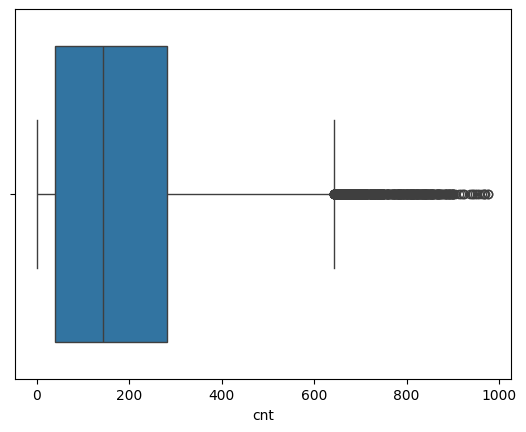

In [11]:
sns.boxplot(x=df['cnt'])

##### 3. Mengubah Nilai pada Kolom agar lebih informatif

In [12]:
df['weekday'] = df['weekday'].map({i: calendar.day_name[i] for i in range(7)})

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_mapping = {0: 2011, 1: 2012}
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}

# Apply mappings
df['season'] = df['season'].map(season_mapping)
df['yr'] = df['yr'].map(yr_mapping)
df['mnth'] = df['mnth'].map(month_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)



In [13]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

In [15]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


#### 3.1. Pengecekan data final

In [16]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### 3.2. Menyimpan dataset baru

In [18]:
df.to_csv("Dashboard/cleaned_bikeshare_hour.csv", index=False)

**Insight**: 

Setalah mengkaji data yang sudah di nilai dan dikaji (**assessing data**) maka dilakukan **cleaning data** yang proses perbaikan data yang masih memilki kesalahan, pertama memprioritaskan kesalahan atau galat seperti di dataset ini ialah format yang salah pada ``dteday`` dan outlier pada kolom cnt atau total pengguna dari pengguna terdaftar dan kasual selanjutnya memberi tambahan seperti penilaian kolom yang diubah menjadi string seperti kolom nama hari, nama bulan, cuaca dan musim, Berikut penjelasan lebih dalam;

- 1. Memastikan Kolom Tanggal dalam Format yang Benar

Kolom dteday yang menyimpan tanggal saat ini berformat object (string). Untuk analisis berbasis waktu, kolom ini perlu diubah menjadi format. Disini digunakan coding ``datetime.df['dteday'] = pd.to_datetime(df['dteday'])``.

``datetime``: Pemanggilan dari library datetime yang sudah kita panggil sebelumnya.

``df['dteday]``: Pemanggilan kolom dari dteday.

``pd.to_datetime``: Kita menggunakan library panda dengan mengombinasikan dengan datetime kita mengubah format dari kolom tersebut menjadi format berbasis waktu.

**Berhasil diubah dari object (tipe data string) menjadi datetime64 (tipe data waktu)**

- 2. Mendeteksi dan Menangani Outliers

Kolom seperti casual, registered, dan cnt yang berisi jumlah penyewaan sepeda dapat memiliki outliers yang signifikan, yang perlu diperiksa dan ditangani. Outliers bisa mempengaruhi model atau analisis Anda, terutama dalam prediksi dan perencanaan. Disini digunakan ``sns.boxplot(x=df['cnt'])``.

``sns``: Dipanggil seaborn yang sudah di import sebagai sns.

``boxplot``: Fungsi dari sns membuat visualisasi data berbasis matplotlib.

``x=df['cnt']``: x sebagai parameter dan [cnt] sebagai kolom yang kita panggil.

**Terdapat outlier dimana grafiknya miring ke kanan tetapi ada beberapa faktor yang harus dilihat seperti cuaca hujan deras dapat menyebabkan outlier**

- 3. Beberapa Tambahan 

Kolom seperti nama hari, nama bulan, musim dan cuaca diubah menjadi string dilakukan agar model lebih bagus untuk dilihat dan tidak sulit untuk dikaji. Serta kolom seperti tahun pertama dan kedua diganti menjadi tahun 2011 dan 2012 menyesuaikan data. Serta menormalisasi data seperti suhu, temperatur, kelembaman dan kecepatan angin serta menghapus variabel yang tidak informatif seperti ID.

- a. Mengubah nama pada kolom hari, musim, bulan, cuaca, dan tahun.

- Hari, bulan, cuaca, musim, tahun

``df['weekday']``: Memanggil kolom dari weekday.

``map``: Menerapkan pemetaan pada setiap kolom. 

``calendar.day_name[i]``: Penggunaan library calender yang sudah di import dan memanggil list nama nama dari 0-6 (Senin ke Minggu).

``{i: calendar.day_name[i] for i in range(7)}``: Penggunaan iterasi dari angka 1-7 (Senin ke Minggu).

- ``_mapping``: Membuat sebuah pemetaan yang nilainya sudah ada.

- b. Mengubah nilai suhu, temperatur, kelemabapan, dan kecepatan angin dari yang sudah ternormalisasi 

df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

*Nilai dari dataset diatas sudah ternormalisasi maka kita menggantinya dengan yang sebelum ternormalisasi seperti suhu dan temperatur diganti menjadi suhu yang sesuai dengan ukuran celsius, kelembapan yang sudah dikalikan dengan 100 dan juga kecepatan angin yang sudah diganti sesuai 
dengan data.

- 3.1. Pengecekan data final 

Jika dilihat nampaknya banyak beberapa pengecekan pada data tersebut, itu dikarenakan untuk mengecek lebih detail dan menyeluruh pada setiap proses cleaning data, setelah itu data tersebut di cek kembali sehingga terdapat masalah dalam mengecek data baru. 

- 3.2. Penyimpanan data baru

Setelah di cek untuk terakhir kali data tersebut sudah berubah maka kita bisa menyimpan data baru ke file direktori

``df``: Disini data tersebut merujuk pada data yang sudah dibersihkan .

``.to_csv()``: Data tersebut disimpan dalam format csv.

-``index=False``: Jika Anda tidak menggunakan index=False (yaitu index=True atau membiarkannya default), file CSV akan menyertakan kolom indeks di awal

## 5. Visualisasi dan Penjelasan Analisis
---

Di awal notebook kita sudah menetapkan dua pertanyaan bisnis yaitu,

- Apakah terdapat pola musiman yang signifikan antara jumlah penyewa kasual (casual) dan jumlah penyewa terdaftar (registered)?
- Bagaimana hubungan antara suhu (temp) dan jumlah penyewa kasual (casual) dibandingkan dengan penyewa terdaftar (registered)?

Maka disini akan menjawab dua pertanyaan diatas

Untuk memudahkan menganalisa data baru maka data baru tersebut di push ke repository github

In [4]:
bikeshare_data = pd.read_csv("https://raw.githubusercontent.com/SDN2003/bike-share-dataset-data-analyse_Ahmad_Rasidn/refs/heads/main/dashboard/cleaned_bikeshare_hour.csv")

# Display the first few rows
bikeshare_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


### Pertanyaan 1: Apakah terdapat pola musiman yang signifikan antara jumlah penyewa kasual (casual) dan jumlah penyewa terdaftar (registered)?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25416\1659062513.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_cnt_data = bikeshare_data.groupby('season')['cnt'].mean()


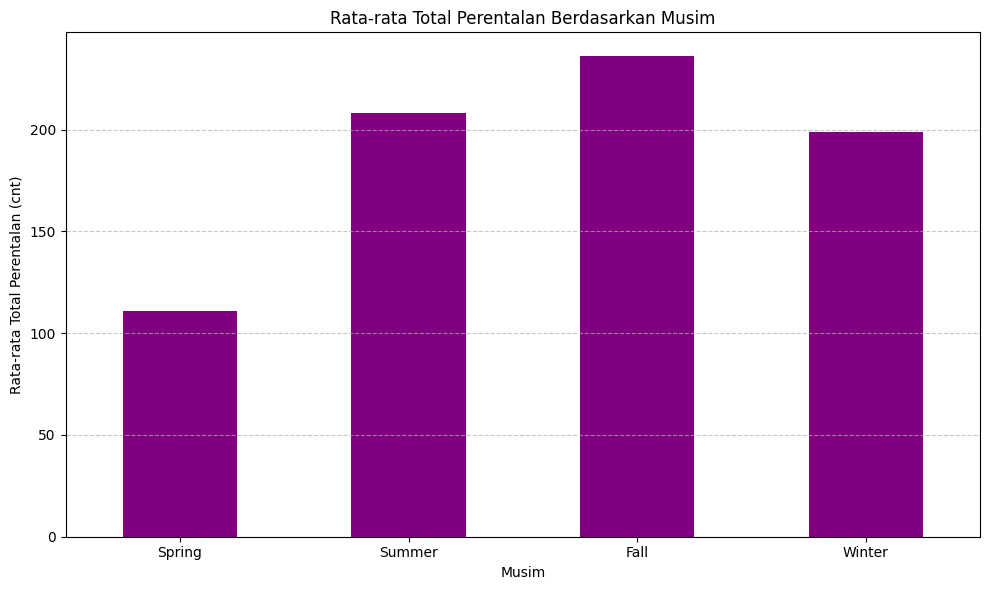

In [35]:
plt.figure(figsize=(10, 6))
seasonal_cnt_data = bikeshare_data.groupby('season')['cnt'].mean()
seasonal_cnt_data.plot(kind='bar', color='purple', rot=0)
plt.title('Rata-rata Total Perentalan Berdasarkan Musim')
plt.ylabel('Rata-rata Total Perentalan (cnt)')
plt.xlabel('Musim')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25416\3098311049.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = bikeshare_data.groupby('season')[['casual', 'registered']].mean()


<Figure size 1000x600 with 0 Axes>

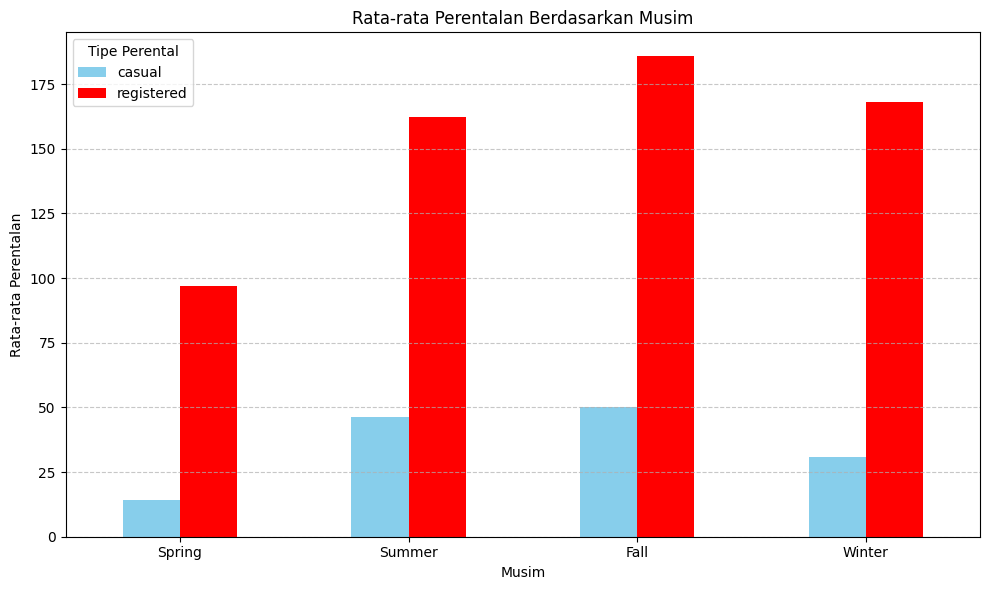

In [36]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Ensure the season column is categorical with the correct order
bikeshare_data['season'] = pd.Categorical(bikeshare_data['season'], categories=season_order, ordered=True)

# Re-aggregate data by season with the correct order
seasonal_data = bikeshare_data.groupby('season')[['casual', 'registered']].mean()

# Plot seasonal patterns with corrected order
plt.figure(figsize=(10, 6))
seasonal_data.plot(kind='bar', figsize=(10, 6), rot=0, color=['skyblue', 'red'])
plt.title('Rata-rata Perentalan Berdasarkan Musim')
plt.ylabel('Rata-rata Perentalan')
plt.xlabel('Musim')
plt.legend(title='Tipe Perental')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara suhu (temp) dan jumlah penyewa kasual (casual) dibandingkan dengan penyewa terdaftar (registered)?

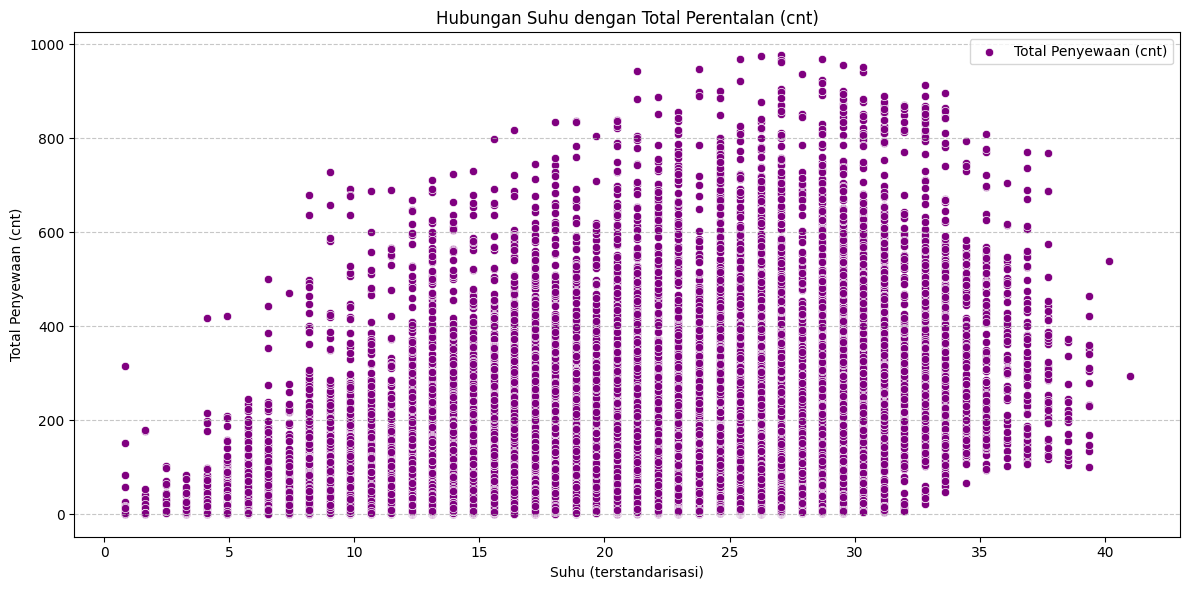

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bikeshare_data, x='temp', y='cnt', color='purple', label='Total Penyewaan (cnt)')
plt.title('Hubungan Suhu dengan Total Perentalan (cnt)')
plt.xlabel('Suhu (terstandarisasi)')
plt.ylabel('Total Penyewaan (cnt)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

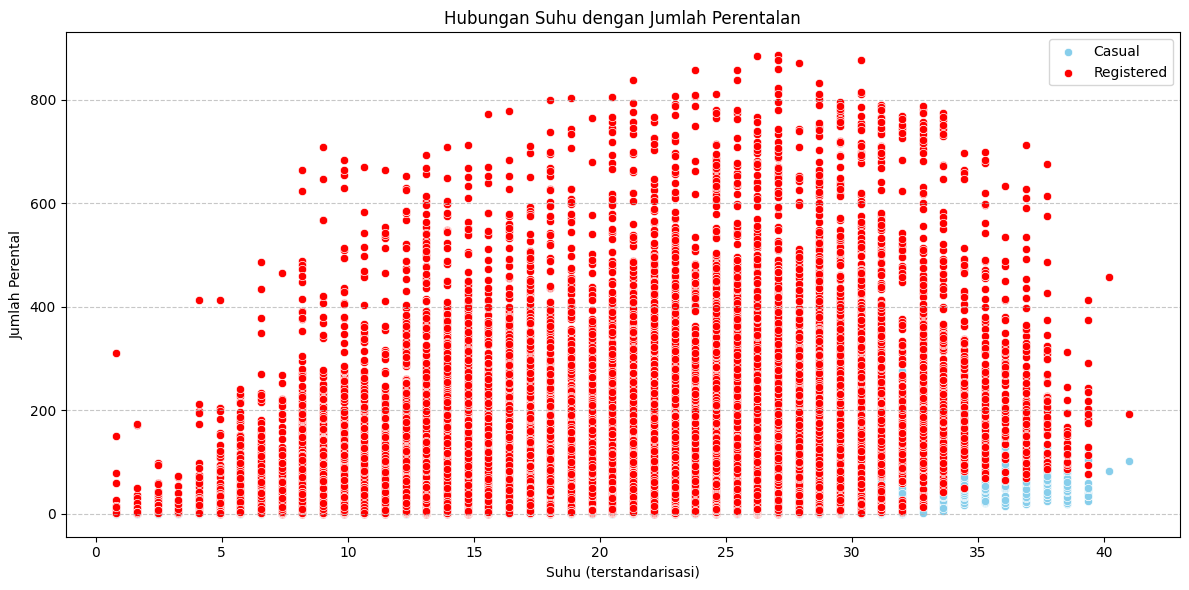

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bikeshare_data, x='temp', y='casual', color='skyblue', label='Casual')
sns.scatterplot(data=bikeshare_data, x='temp', y='registered', color='red', label='Registered')
plt.title('Hubungan Suhu dengan Jumlah Perentalan')
plt.xlabel('Suhu (terstandarisasi)')
plt.ylabel('Jumlah Perental')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**insight:**

- Apakah terdapat pola musiman yang signifikan antara jumlah perental kasual (casual) dan jumlah perental terdaftar (registered)?

Dari chart pertama, grafik ungu menunjukkan total dari semua pengguna Pertama kita lihat dari chart pertama, 

- Musim Fall (Gugur) memiliki jumlah perentalan tertinggi dibandingkan musim lainnya, dengan rata-rata sekitar 230 perentalan.

- Musim Summer (Panas) juga memiliki tingkat perentalan yang tinggi, mendekati angka 210.

- Musim Winter (Dingin) menunjukkan penurunan jumlah perentalan, tetapi angkanya masih cukup signifikan, sekitar 200 perentalan. 

- Musim Spring (Semi) memiliki jumlah perentalan terendah, dengan rata-rata sekitar 110.


**Total perentalan sepeda turun di signifikan pada musim semi dan musim dingin dibandingkan musim gugur. Bisa kita beri kesimpulan bahwa pengguna perentalan sepeda lebih memilih melakukan perentalan pada musim yang lebih hangat dan nyaman.**

Pernyataan diatas belum menjawab, pertanyaan diatas maka dilanjutkan dengan melihat dari chart kedua,

- Spring (Musim Semi):

Perental kasual memiliki jumlah terendah dibanding musim lainnya (sekitar 15).

Perental terdaftar juga rendah, tetapi lebih tinggi dibanding penyewa kasual (sekitar 100).

- Summer (Musim Panas):

Perental kasual meningkat signifikan (~45), tertinggi dibandingkan musim lainnya.

Perental terdaftar juga mengalami peningkatan drastis (~160).

- Fall (Musim Gugur):

Perental kasual tetap tinggi (~50), bahkan sedikit lebih tinggi dibanding musim panas.

Perental terdaftar mencapai puncaknya di musim ini (~180).

- Winter (Musim Dingin):

Perental kasual turun signifikan (~30).

Perental terdaftar juga mengalami penurunan (~170) tetapi masih tetap tinggi.

**Pada chart kedua penrentalan kasual cenderung lebih banyak melakukan perentalan selama musim panas (Summer) dan musim gugur (Fall), menunjukkan bahwa cuaca hangat mendorong perental sepeda oleh pengguna kasual dan pada chart penyewa terdaftar menunjukkan pola yang lebih konsisten sepanjang musim, meskipun sedikit meningkat di musim panas dan menurun di musim dingin (Winter).**

- Bagaimana hubungan antara suhu (temp) dan jumlah perental kasual (casual) dibandingkan dengan perental terdaftar (registered)?

Kita lihat dari scatter plot pertama, 

Dari scatter plot diatas, titik titik ungu tersebut melambangkan pengguna. Berdasarkan scatter plot diatas pada suhu rendah (sekitar 0–10 °C), jumlah penyewa cukup sedikit, dengan sebagian besar titik di bawah 400 pengguna. Seiring dengan meningkatnya suhu (sekitar 15–30 °C), jumlah perentalan bertambah signifikan, dengan banyak titik mendekati 900–1000 pengguna. Pada suhu ekstrem (di atas 35 °C) jumlah perentalan turun signifikan, berada di rentang 100–300 pengguna. 

**Sehingga dapat disimpulkan bahwa pengguna lebih memilih merental pada suhu yang nyaman sekita (sekitar 15–30 °C)**

Pernyataan diatas belum menjawab, pertanyaan diatas maka dilanjutkan dengan melihat dari scatter plot kedua,

Berdasarkan scatter plot diatas, titik untuk menunjukkan pengguna terdaftar ditunjukkan berwarna merah sementara biru untuk pengguna kasual

- Tren Pengguna Terdaftar (Registered)
Berdasarkan scatter plot diatas, Jumlah mereka secara umum lebih tinggi dibandingkan perental kasual pada berbagai tingkat suhu. Pada suhu di atas 35 (panas tinggi), jumlah perental terdaftar mulai menurun. Hal ini bisa disebabkan oleh kenyamanan yang berkurang pada suhu ekstrem.

- Tren Pengguna Kasual (Casual)
Secara umum, jumlah mereka jauh lebih sedikit dibandingkan perental terdaftar. Tidak terlihat peningkatan signifikan pada jumlah penrental kasual seiring naiknya suhu. Grafik memperlihatkan titik-titik yang lebih tersebar dengan jumlah yang lebih rendah. Pada suhu sekitar 20-30 °C, terlihat sedikit peningkatan jumlah penyewa kasual, namun tidak sekuat tren penyewa terdaftar.

Dari responsivitas terhadap suhu. Pengguna terdaftar mungkin memiliki rutinitas yang lebih konsisten dalam menggunakan layanan sewa, sementara pengguna kasual lebih dipengaruhi oleh faktor kenyamanan, seperti suhu.

**Ini menunjukkan bahwa layanan sewa lebih sering digunakan oleh pengguna terdaftar yang kurang responsif terhadap perubahan suhu, sedangkan penyewa kasual lebih dipengaruhi oleh suhu.**

## 6. Kesimpulan dan Insight
---

Setelah pegkajian dari data diatas kiat dapat memberi kesimpulan 

- Pertanyaan 1

Faktor musim sangat berdampak jauh lebih besar terhadap pengguna kasual dibandingkan pengguna terdaftar, walau demikian dalam segi bisnis kita bisa membuka lapak untuk perentalan sepeda pada musim panas dan gugur dikarenakan cuaca yang hangat dapat meningkatkan efektifitas dan bisnis terhadap lapak

- Pertanyaan 2

Faktor suhu juga dapat berdampak terhadap pembisnis yang membuka usaha pada suhu yang lebih hangat (15–30 °C) dikarenakan kenaikan signifikan terhadap pengguna kasual, walau begitu pengguna terdaftar tidak terdampak pada kenaikan suhu dan menunjukkan konsistensi dari suhu rendah sampai suhu ekstrim